<a href="https://colab.research.google.com/github/prachikale2004/Fake-News-Detection-Model-using-TensorFlow-in-Python/blob/main/Customer_Churn_Prediction_Using_%2B_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Churn Prediction Using Machine Learning**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
import pandas as pd

# Load data from CSV (after SQL extraction)
df = pd.read_csv("Customer-Churn.csv")

# Check for missing values
print(df.isnull().sum())



customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
print(df.dtypes)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


In [ ]:
print(df["TotalCharges"].isnull().sum())


11


In [ ]:

df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


<ipython-input-11-59466351b608>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [ ]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())



In [ ]:
print(df["TotalCharges"].isnull().sum())  # Should print 0



0


**bold text**Exploratory Data Analysis (EDA)

In [ ]:
print(df.describe())


       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2281.916928
std         0.368612    24.559481       30.090047   2265.270398
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000


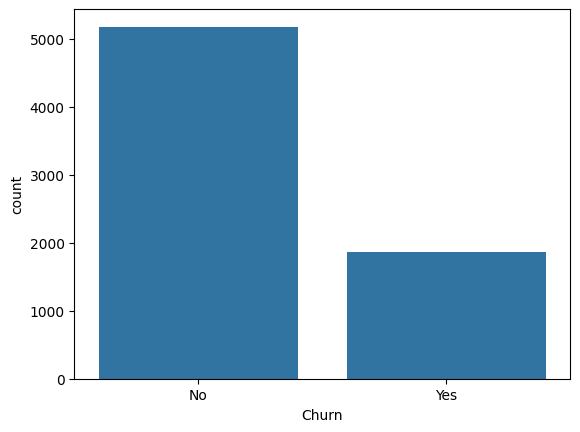

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Churn", data=df)
plt.show()


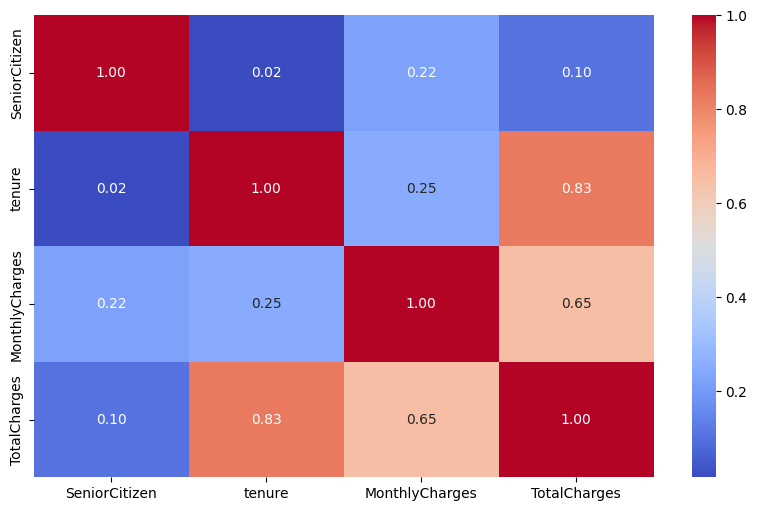

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numerical columns for correlation
numeric_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


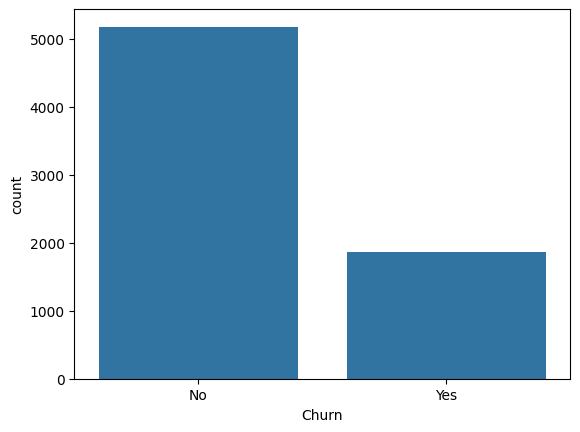

In [ ]:
sns.countplot(x="Churn", data=df)
plt.show()


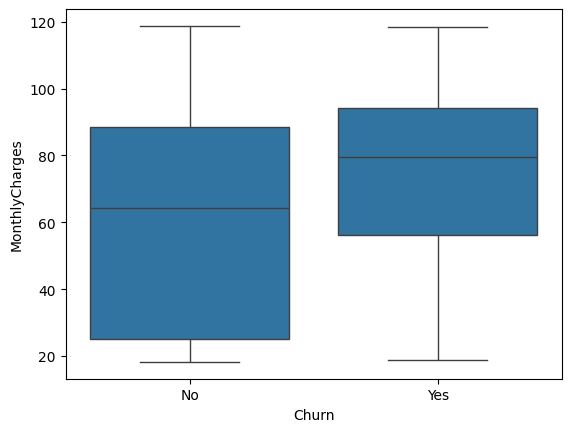

In [ ]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.show()


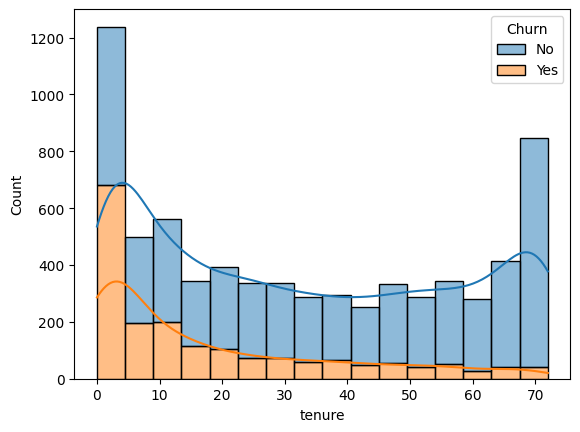

In [ ]:
sns.histplot(df, x="tenure", hue="Churn", multiple="stack", kde=True)
plt.show()



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert binary categorical columns using Label Encoding
binary_cols = ["gender", "Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# Convert multi-category features using One-Hot Encoding
df = pd.get_dummies(df, columns=["InternetService", "Contract", "PaymentMethod", "MultipleLines",
                                  "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
                                  "StreamingTV", "StreamingMovies"], drop_first=True)

print(df.head())  # Check the transformed dataset


   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  ...  \
0             0                 1           29.85         29.85  ...   
1             1                 0           56.95       1889.50  ...   
2             1                 1           53.85        108.15  ...   
3             0                 0           42.30       1840.75  ...   
4             1                 1           70.70        151.65  ...   

   OnlineBackup_No internet service  OnlineBackup_Yes  \
0                             False              True   
1                             False   

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["MonthlyCharges", "TotalCharges"]] = scaler.fit_transform(df[["MonthlyCharges", "TotalCharges"]])


In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=["customerID", "Churn"])  # Drop customerID and target variable
y = df["Churn"]  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training size: {X_train.shape}, Testing size: {X_test.shape}")


Training size: (5634, 30), Testing size: (1409, 30)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8062455642299503

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



**SMOTE (Logistic Regression) **

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Class distribution after SMOTE:\n", y_train_resampled.value_counts())


Class distribution after SMOTE:
 Churn
0    4139
1    4139
Name: count, dtype: int64


In [ ]:
from xgboost import XGBClassifier

# Train XGBoost on SMOTE data
xgb_model_smote = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model_smote.fit(X_train_resampled, y_train_resampled)

# Predict on original test data
y_pred_xgb_smote = xgb_model_smote.predict(X_test)

# Evaluate performance
print("XGBoost (SMOTE) Accuracy:", accuracy_score(y_test, y_pred_xgb_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_smote))


XGBoost (SMOTE) Accuracy: 0.7551454932576295

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83      1035
           1       0.53      0.67      0.59       374

    accuracy                           0.76      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.78      0.76      0.76      1409



In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression model (after SMOTE)
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
import joblib

# Save the trained Logistic Regression model
joblib.dump(logistic_regression_model, "churn_model.pkl")


['churn_model.pkl']

**Make Predictions on New Data**

In [ ]:
import pandas as pd
import joblib

# Load the trained model
loaded_model = joblib.load("churn_model.pkl")

# Ensure new input has the same preprocessing as training data
# (Use the same categorical encoding and feature selection)
new_customer = pd.DataFrame({
    "SeniorCitizen": [0],
    "tenure": [12],
    "MonthlyCharges": [45.5],
    "TotalCharges": [540.0],
    "Contract_One year": [0],
    "Contract_Two year": [1],
    "Dependents": [0],
    "DeviceProtection_No internet service": [0],
    "DeviceProtection_Yes": [1],
    # Include all the categorical dummy variables from training
})

# Ensure column order matches the training data
expected_columns = loaded_model.feature_names_in_
new_customer = new_customer.reindex(columns=expected_columns, fill_value=0)

# Make prediction
prediction = loaded_model.predict(new_customer)
print("Churn Prediction:", prediction[0])


Churn Prediction: 1
